## Fast Fourier Transform 

In the following exercise, you will use a Fourier transform to find the frequency components of a signal buried in noise. Specify the parameters of a signal with a sampling frequency of 1 kHz and a signal duration of 1.5 seconds.

#### To implement the 1st stage FFT, you can use the following steps:


1. Define a signal. In this case (amplitude = A, frequency = f)  
     
* `signal = A*sin(2*pi*f*t)`  

2. Run the FFT for the signal using the MATLAB FFT function for the dimension of samples N.  

* `signal_fft = fft(signal,N);`

This returns the N-point DFT. If N is not specified, signal_fft is the same size as signal.  

3. The output of FFT processing of a signal is a complex number a+jb. Since we just care about the magnitude we take the absolute value sqrt(a^2+b^2) of the complex number.  

* `signal_fft = abs(signal_fft); `   

4. FFT output generates a mirror image of the signal. But we are only interested in the positive half of signal length L since it is the replica of the negative half and has all the information we need.  

* `signal_fft  = signal_fft(1:L/2+1)`         

5. Plot this output against frequency.  

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
Fs = 1000 # sampling frequency 
T =  1/Fs # Sampling period 
L = 1500;  #Length of signal
t = [i*T for i in range(L)]   #Time vector 

In [5]:
# TODO: Form a signal containing a 77Hz sinusoid of amplitude 0.7 and a 43Hz sinusoid of amplitude 2. 
signal1 = [0.7 * np.sin(2*np.pi*77*t_) for t_ in t]
signal2 = [2.0 * np.sin(2*np.pi*43*t_) for t_ in t]
s = [s1+s2 for s1, s2 in zip(signal1,signal2)]

In [9]:
# Corrupt the signal with noise 
x = s+2*np.random.randn(len(t))

Text(0.5, 1.0, 'Signal corrupted with zero-mean random noise')

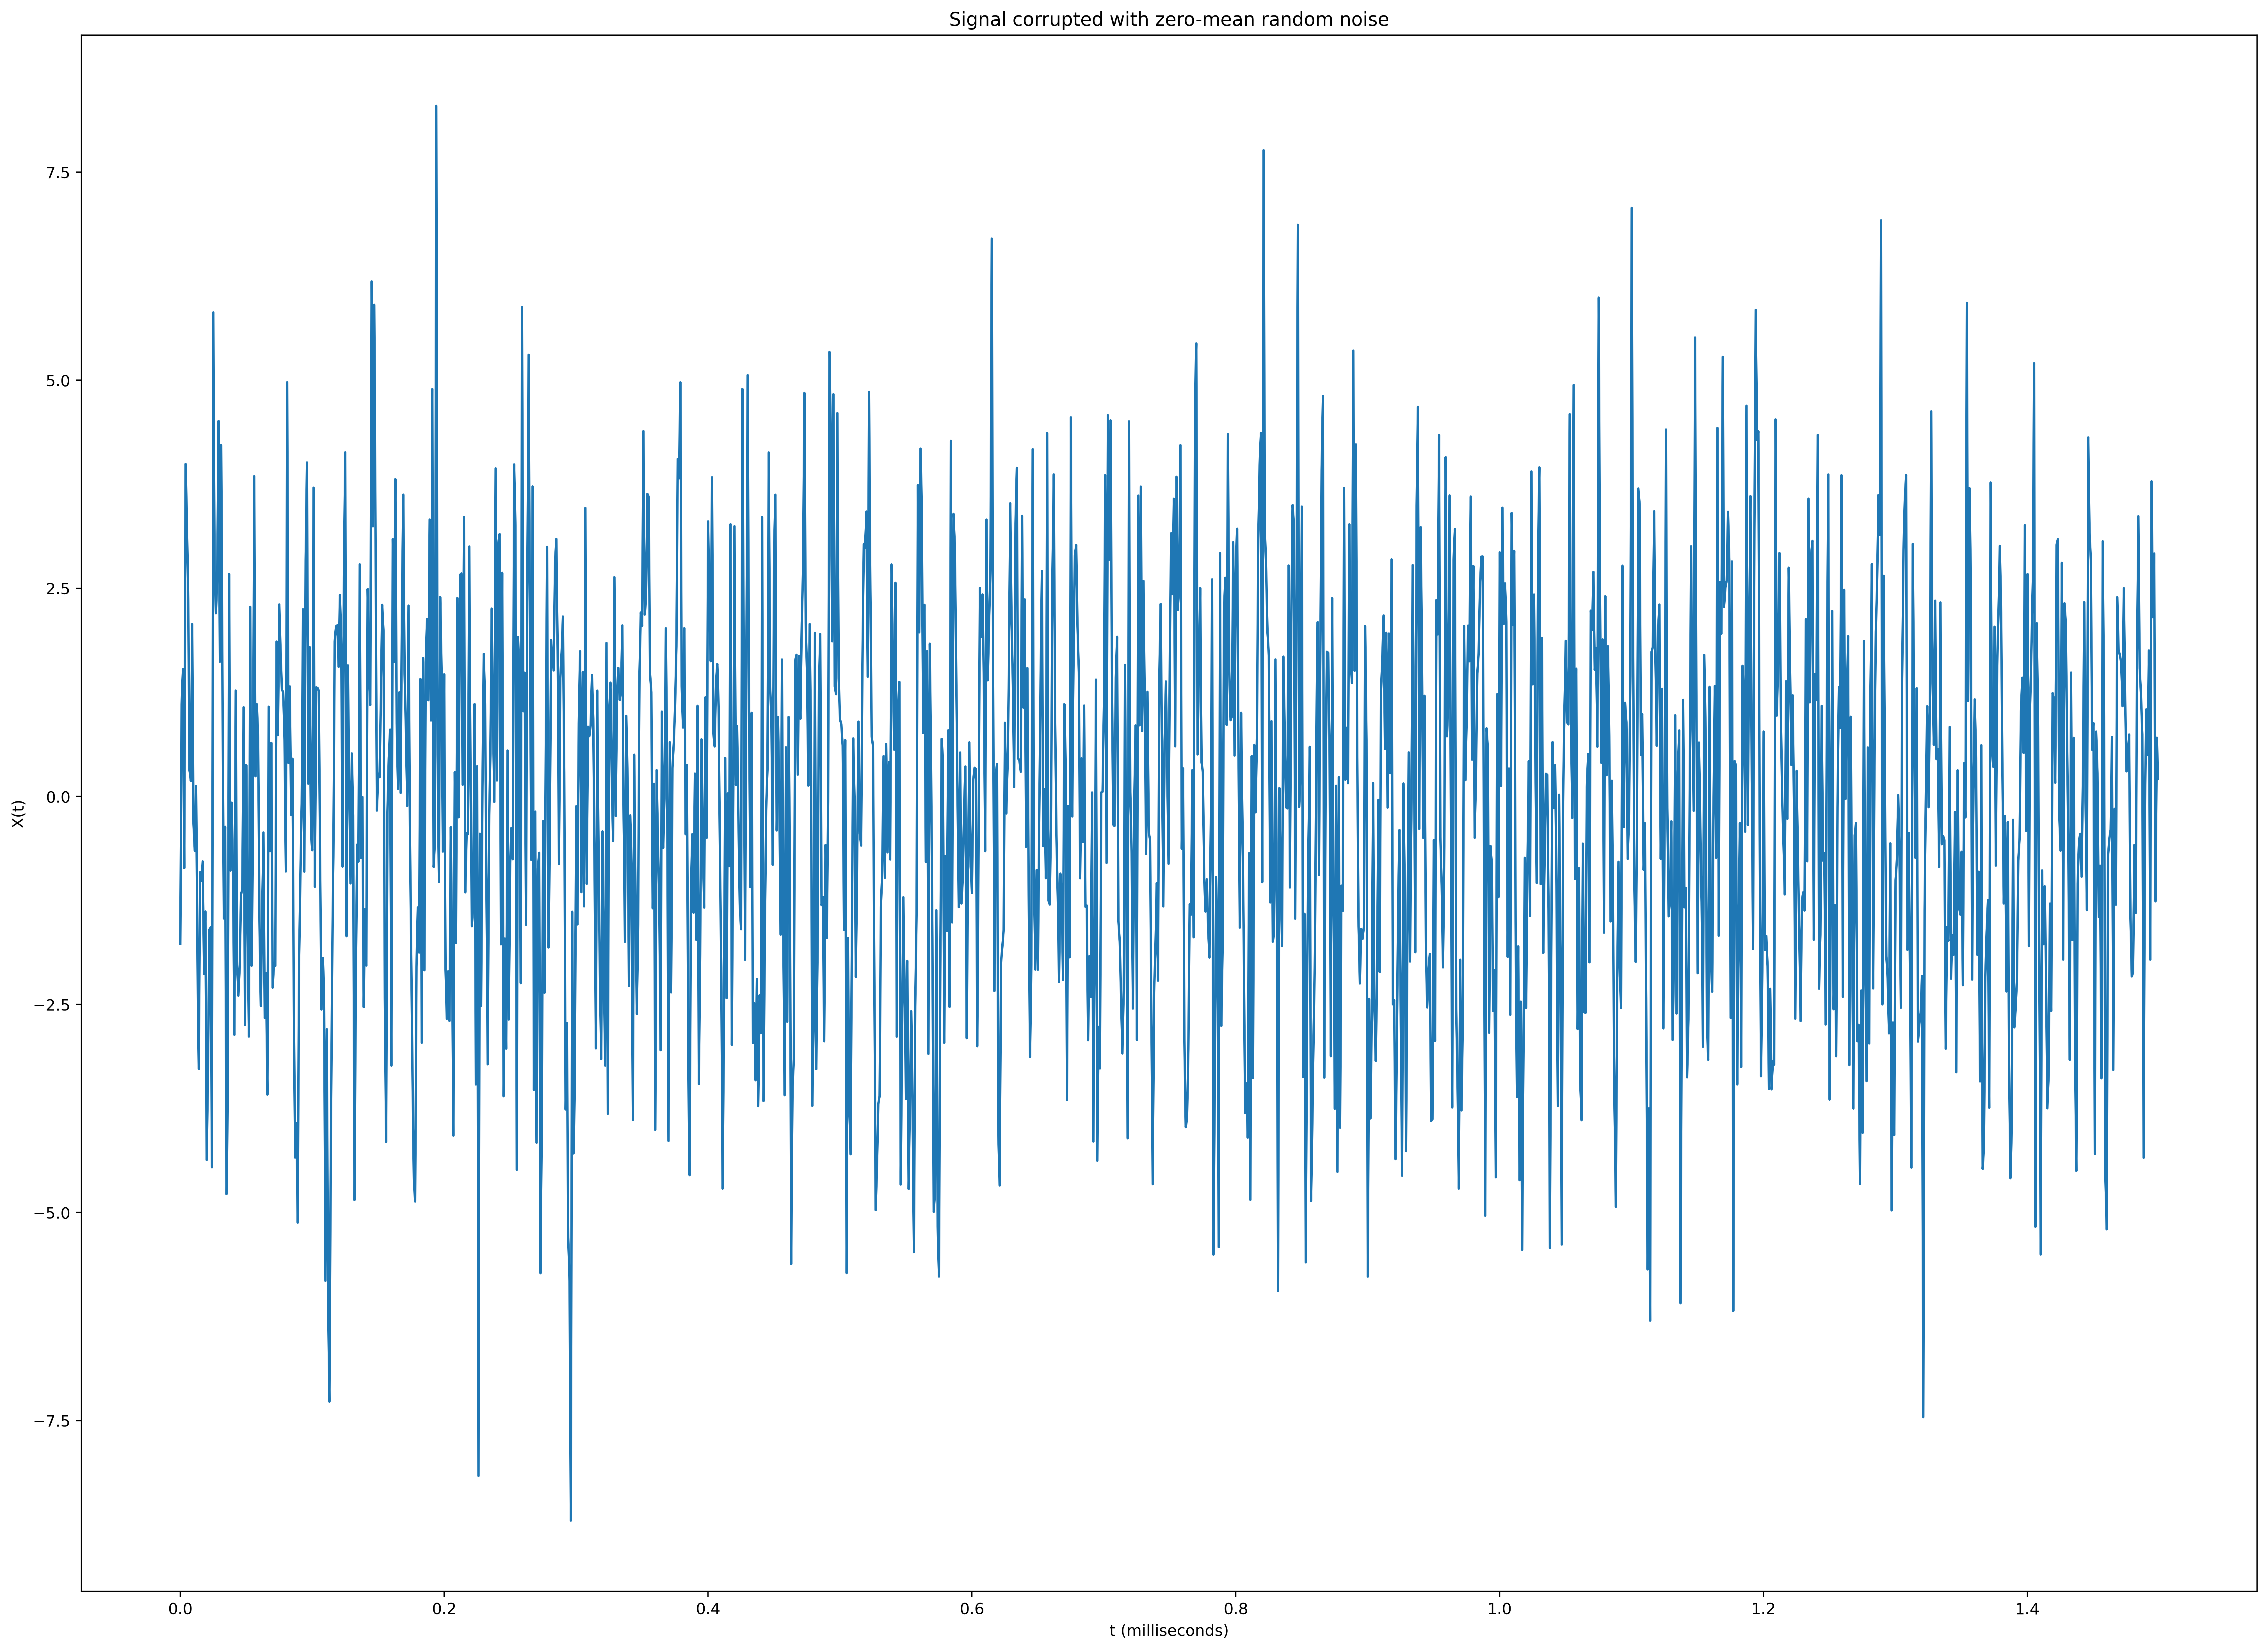

In [10]:
plt.figure(figsize=(25,18),dpi=400)
plt.plot(t,x, label = "signal")
plt.xlabel("t (milliseconds)")
plt.ylabel("X(t)")
plt.title("Signal corrupted with zero-mean random noise")

In [17]:
# TODO: Compute the Fourier transfomr of the signal 
Y = np.fft.fft(x)

In [20]:
# TODO: Compute the two-sided spectrum P2. Then compute the single-sided specrum P1 based on P2 and the even-valued signal length L. 
P2 = np.abs(Y/L) #Normalize by number of samples 
print(f"The fft result : {P2}")


# We split at Nquist frequency 

P1 = P2[:L//2+1]

P1[1:-1] *= 2  # Multiply by 2 to preserve total power (except DC and Nyquist)

The fft result : [0.09015225 0.03732813 0.02205724 ... 0.05690752 0.02205724 0.03732813]


In [18]:
# Frequency axis for plotting
f = Fs * np.arange(0, L // 2 + 1) / L

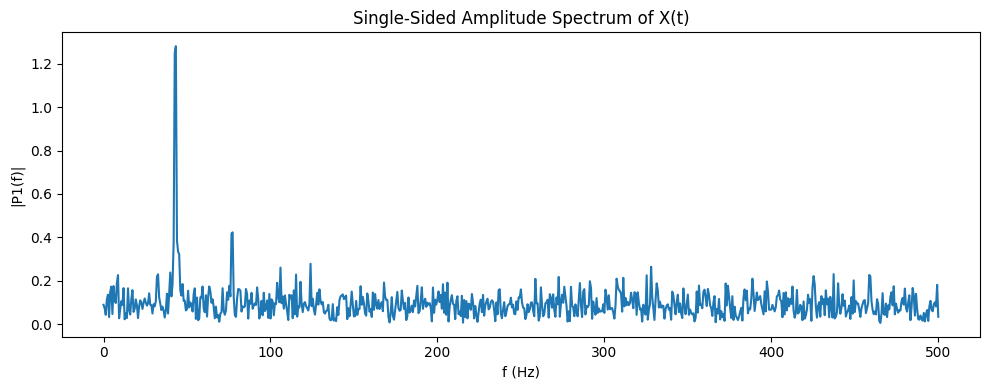

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(f, P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.tight_layout()
plt.show()